In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('./cricket_data.csv')

In [3]:
data

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193463,1237181,1,12,5,RR Pant,SS Iyer,NM Coulter-Nile,0,0,0,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193464,1237181,1,12,6,RR Pant,SS Iyer,NM Coulter-Nile,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193465,1237181,1,13,1,RR Pant,SS Iyer,KH Pandya,0,1,1,0,0,NaN,NaN,NaN,wides,Delhi Capitals,Mumbai Indians
193466,1237181,1,13,2,RR Pant,SS Iyer,KH Pandya,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians


# Data Pre Processing 

In [4]:
data.dtypes

id                   int64
inning               int64
over                 int64
ball                 int64
batsman             object
non_striker         object
bowler              object
batsman_runs         int64
extra_runs           int64
total_runs           int64
non_boundary         int64
is_wicket            int64
dismissal_kind      object
player_dismissed    object
fielder             object
extras_type         object
batting_team        object
bowling_team        object
dtype: object

In [5]:
data.columns

Index(['id', 'inning', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'batsman_runs', 'extra_runs', 'total_runs', 'non_boundary', 'is_wicket',
       'dismissal_kind', 'player_dismissed', 'fielder', 'extras_type',
       'batting_team', 'bowling_team'],
      dtype='object')

In [6]:
data.shape

(193468, 18)

In [7]:
data.isnull().sum()

id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team           191
dtype: int64

In [8]:
data.duplicated().sum()

1

In [9]:
data.describe()

,id,inning,over,ball,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket
count,1.934680e+05,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000
mean,7.567688e+05,1.482131,9.177027,3.615967,1.240231,0.066414,1.306645,0.000083,0.049078
std,3.060971e+05,0.499682,5.676848,1.807128,1.610867,0.339991,1.598802,0.009094,0.216031
min,3.359820e+05,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.012270e+05,1.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.292970e+05,1.000000,9.000000,4.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,1.082628e+06,2.000000,14.000000,5.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.237181e+06,2.000000,19.000000,9.000000,6.000000,7.000000,7.000000,1.000000,1.000000


<AxesSubplot:>

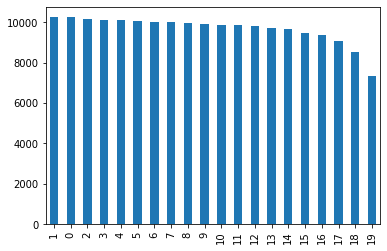

In [10]:
data['over'].value_counts().plot(kind='bar')

<AxesSubplot:>

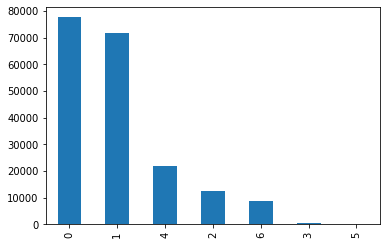

In [11]:
data['batsman_runs'].value_counts().plot(kind='bar')

<AxesSubplot:>

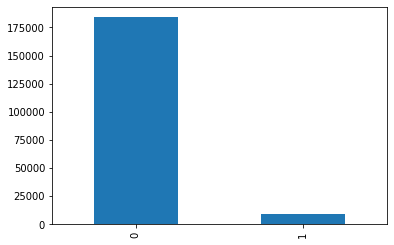

In [12]:
data['is_wicket'].value_counts().plot(kind='bar')

<AxesSubplot:>

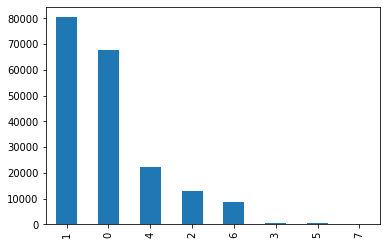

In [13]:
data['total_runs'].value_counts().plot(kind='bar')

<AxesSubplot:>

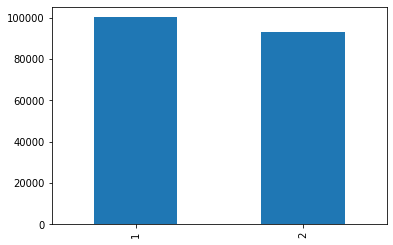

In [14]:
data['inning'].value_counts().plot(kind='bar')

In [15]:
len(pd.unique(data['batsman']))

537

In [16]:
no_of_runs=pd.DataFrame(data.groupby('batsman')['batsman_runs'].agg(sum)).reset_index().sort_values(by='batsman_runs',ascending=False).reset_index(drop=True)
no_of_runs

,batsman,batsman_runs
0,V Kohli,5878
1,SK Raina,5368
2,DA Warner,5254
3,RG Sharma,5230
4,S Dhawan,5197
...,...,...
532,IC Pandey,0
533,S Kaushik,0
534,ND Doshi,0
535,V Pratap Singh,0


In [17]:
no_of_balls=data.groupby('batsman')['ball'].count().reset_index().sort_values(by='ball',ascending=True).reset_index(drop=True)
no_of_balls

,batsman,ball
0,C Nanda,1
1,S Lamichhane,1
2,S Kaushik,1
3,Y Prithvi Raj,1
4,YA Abdulla,1
...,...,...
532,DA Warner,3819
533,SK Raina,4041
534,RG Sharma,4088
535,S Dhawan,4208


# Strike Rate of Batsman

In [18]:
strike_rate_data=pd.merge(no_of_runs,no_of_balls,on='batsman')
strike_rate_data

,batsman,batsman_runs,ball
0,V Kohli,5878,4609
1,SK Raina,5368,4041
2,DA Warner,5254,3819
3,RG Sharma,5230,4088
4,S Dhawan,5197,4208
...,...,...,...
532,IC Pandey,0,2
533,S Kaushik,0,1
534,ND Doshi,0,13
535,V Pratap Singh,0,1


In [19]:
strike_rate=pd.DataFrame()
strike_rate['strike_rate']=(strike_rate_data['batsman_runs']/strike_rate_data['ball'] )*100
strike_rate['batsman']=strike_rate_data['batsman']
strike_rate

,strike_rate,batsman
0,127.533087,V Kohli
1,132.838406,SK Raina
2,137.575281,DA Warner
3,127.935421,RG Sharma
4,123.502852,S Dhawan
...,...,...
532,0.000000,IC Pandey
533,0.000000,S Kaushik
534,0.000000,ND Doshi
535,0.000000,V Pratap Singh


# Average number of Boundries

In [20]:
boundries= data.loc[(data['batsman_runs'] == 4) | (data['batsman_runs'] == 6)]
boundries

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
18,335982,1,9,5,BB McCullum,RT Ponting,SB Joshi,6,0,6,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
21,335982,1,10,2,RT Ponting,BB McCullum,JH Kallis,4,0,4,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
23,335982,1,10,4,RT Ponting,BB McCullum,JH Kallis,6,0,6,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
27,335982,1,11,2,BB McCullum,RT Ponting,SB Joshi,6,0,6,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
33,335982,1,12,2,BB McCullum,DJ Hussey,JH Kallis,4,0,4,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193420,1237181,1,5,5,SS Iyer,RR Pant,NM Coulter-Nile,4,0,4,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193441,1237181,1,9,2,RR Pant,SS Iyer,KH Pandya,6,0,6,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193444,1237181,1,9,5,RR Pant,SS Iyer,KH Pandya,6,0,6,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193454,1237181,1,11,3,RR Pant,SS Iyer,KA Pollard,4,0,4,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians


In [21]:
no_of_balls_hitted_boundry=boundries.groupby('batsman')['ball'].count().reset_index().sort_values(by='ball',ascending=True).reset_index(drop=True)
no_of_balls_hitted_boundry

,batsman,ball
0,K Upadhyay,1
1,GD McGrath,1
2,KL Nagarkoti,1
3,AR Bawne,1
4,TA Boult,1
...,...,...
434,SK Raina,687
435,S Dhawan,700
436,DA Warner,705
437,V Kohli,706


In [22]:
avg_balls_for_boundries=pd.merge(no_of_balls_hitted_boundry,no_of_balls,on='batsman')
avg_balls_for_boundries

,batsman,ball_x,ball_y
0,K Upadhyay,1,9
1,GD McGrath,1,5
2,KL Nagarkoti,1,32
3,AR Bawne,1,12
4,TA Boult,1,15
...,...,...,...
434,SK Raina,687,4041
435,S Dhawan,700,4208
436,DA Warner,705,3819
437,V Kohli,706,4609


In [23]:
avg_balls_for_boundries['avg_no_of_boundry']=avg_balls_for_boundries['ball_y']/avg_balls_for_boundries['ball_x']

In [24]:
avg_balls_for_boundries

,batsman,ball_x,ball_y,avg_no_of_boundry
0,K Upadhyay,1,9,9.000000
1,GD McGrath,1,5,5.000000
2,KL Nagarkoti,1,32,32.000000
3,AR Bawne,1,12,12.000000
4,TA Boult,1,15,15.000000
...,...,...,...,...
434,SK Raina,687,4041,5.882096
435,S Dhawan,700,4208,6.011429
436,DA Warner,705,3819,5.417021
437,V Kohli,706,4609,6.528329


# % of batsman not out 

In [25]:
wickets=data[data['is_wicket']==1]
wickets

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
32,335982,1,12,1,RT Ponting,BB McCullum,JH Kallis,0,0,0,0,1,caught,RT Ponting,P Kumar,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
64,335982,1,17,1,DJ Hussey,BB McCullum,AA Noffke,0,0,0,0,1,caught,DJ Hussey,CL White,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
112,335982,1,5,2,SC Ganguly,BB McCullum,Z Khan,0,0,0,0,1,caught,SC Ganguly,JH Kallis,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
132,335982,2,7,5,MV Boucher,CL White,SC Ganguly,0,0,0,0,1,caught,MV Boucher,M Kartik,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
135,335982,2,8,2,B Akhil,CL White,AB Agarkar,0,0,0,0,1,caught,B Akhil,RT Ponting,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193381,1237181,1,19,2,AR Patel,SS Iyer,NM Coulter-Nile,0,0,0,0,1,caught,AR Patel,AS Roy (sub),NaN,Delhi Capitals,Mumbai Indians
193385,1237181,1,19,6,SS Iyer,K Rabada,NM Coulter-Nile,1,0,1,0,1,run out,K Rabada,NaN,NaN,Delhi Capitals,Mumbai Indians
193386,1237181,1,0,1,MP Stoinis,S Dhawan,TA Boult,0,0,0,0,1,caught,MP Stoinis,Q de Kock,NaN,Delhi Capitals,Mumbai Indians
193401,1237181,1,2,4,AM Rahane,S Dhawan,TA Boult,0,0,0,0,1,caught,AM Rahane,Q de Kock,NaN,Delhi Capitals,Mumbai Indians


In [26]:
batsman_out=wickets.groupby('batsman')['is_wicket'].count().reset_index().sort_values(by='is_wicket',ascending=True).reset_index(drop=True)
batsman_out

,batsman,is_wicket
0,M Prasidh Krishna,1
1,Iqbal Abdulla,1
2,BJ Haddin,1
3,BE Hendricks,1
4,SS Cottrell,1
...,...,...
497,S Dhawan,152
498,SK Raina,160
499,V Kohli,163
500,RV Uthappa,169


In [27]:
batsman_wickets_details=pd.merge(batsman_out,no_of_balls,on='batsman')
batsman_wickets_details

,batsman,is_wicket,ball
0,M Prasidh Krishna,1,11
1,Iqbal Abdulla,1,86
2,BJ Haddin,1,11
3,BE Hendricks,1,3
4,SS Cottrell,1,2
...,...,...,...
497,S Dhawan,152,4208
498,SK Raina,160,4041
499,V Kohli,163,4609
500,RV Uthappa,169,3658


In [28]:
batsman_wickets_details['%_of_batsman_not_out']=100-(batsman_wickets_details['is_wicket']/batsman_wickets_details['ball'])*100
batsman_wickets_details.sort_values(by='%_of_batsman_not_out',ascending=False).reset_index(drop=True)

,batsman,is_wicket,ball,%_of_batsman_not_out
0,Iqbal Abdulla,1,86,98.837209
1,RD Gaikwad,3,173,98.265896
2,MN van Wyk,3,135,97.777778
3,PD Collingwood,4,159,97.484277
4,PV Tambe,1,39,97.435897
...,...,...,...,...
497,Sunny Gupta,1,1,0.000000
498,C Nanda,1,1,0.000000
499,RR Bhatkal,2,2,0.000000
500,S Lamichhane,1,1,0.000000


# Total number of matches played|

In [29]:
total=data.reset_index()
total

,index,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193463,193463,1237181,1,12,5,RR Pant,SS Iyer,NM Coulter-Nile,0,0,0,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193464,193464,1237181,1,12,6,RR Pant,SS Iyer,NM Coulter-Nile,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193465,193465,1237181,1,13,1,RR Pant,SS Iyer,KH Pandya,0,1,1,0,0,NaN,NaN,NaN,wides,Delhi Capitals,Mumbai Indians
193466,193466,1237181,1,13,2,RR Pant,SS Iyer,KH Pandya,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians


In [30]:
total_matches=total.groupby(['batsman','id'])['index'].count().reset_index()
total_matches

,batsman,id,index
0,A Ashish Reddy,548346,10
1,A Ashish Reddy,548352,3
2,A Ashish Reddy,548359,8
3,A Ashish Reddy,548373,4
4,A Ashish Reddy,548376,5
...,...,...,...
12157,Z Khan,980903,9
12158,Z Khan,980993,4
12159,Z Khan,1082595,1
12160,Z Khan,1082635,11


In [31]:
total_matches_played_by_batsman=total_matches.groupby('batsman')['id'].count().sort_values(ascending=False).reset_index()
total_matches_played_by_batsman

,batsman,id
0,RG Sharma,194
1,SK Raina,189
2,V Kohli,184
3,MS Dhoni,182
4,RV Uthappa,182
...,...,...
532,MA Wood,1
533,B Stanlake,1
534,Mashrafe Mortaza,1
535,Mohammad Ashraful,1


# % of Dot balls

In [32]:
dot_balls=data[(data['batsman_runs']==0)].groupby('batsman')['ball'].count().reset_index()
dot_balls

,batsman,ball
0,A Ashish Reddy,61
1,A Chandila,3
2,A Chopra,45
3,A Choudhary,4
4,A Dananjaya,2
...,...,...
525,YV Takawale,100
526,Yashpal Singh,39
527,Younis Khan,4
528,Yuvraj Singh,976


In [33]:
per_dot_balls=pd.merge(dot_balls,no_of_balls,on='batsman')
per_dot_balls

,batsman,ball_x,ball_y
0,A Ashish Reddy,61,196
1,A Chandila,3,7
2,A Chopra,45,75
3,A Choudhary,4,20
4,A Dananjaya,2,5
...,...,...,...
525,YV Takawale,100,183
526,Yashpal Singh,39,67
527,Younis Khan,4,7
528,Yuvraj Singh,976,2205


In [34]:
per_dot_balls['per_dot_balls']=(per_dot_balls['ball_x']/per_dot_balls['ball_y'])*100
per_dot_balls.sort_values(by='per_dot_balls').reset_index(drop=True)

,batsman,ball_x,ball_y,per_dot_balls
0,DAJ Bracewell,1,9,11.111111
1,A Choudhary,4,20,20.000000
2,SJ Srivastava,1,5,20.000000
3,GB Hogg,5,22,22.727273
4,LH Ferguson,7,30,23.333333
...,...,...,...,...
525,V Pratap Singh,1,1,100.000000
526,DR Sams,2,2,100.000000
527,U Kaul,1,1,100.000000
528,ND Doshi,13,13,100.000000


# Average number of matches scored 30+ runs

In [35]:
total_score_in_every_match=data.groupby(['batsman','id'])['batsman_runs'].sum().reset_index()
total_score_in_every_match

,batsman,id,batsman_runs
0,A Ashish Reddy,548346,10
1,A Ashish Reddy,548352,3
2,A Ashish Reddy,548359,8
3,A Ashish Reddy,548373,10
4,A Ashish Reddy,548376,4
...,...,...,...
12157,Z Khan,980903,4
12158,Z Khan,980993,2
12159,Z Khan,1082595,1
12160,Z Khan,1082635,2


In [36]:
score_above_thirty=total_score_in_every_match[total_score_in_every_match['batsman_runs']>=30].reset_index()
score_above_thirty

,index,batsman,id,batsman_runs
0,11,A Ashish Reddy,598030,36
1,20,A Ashish Reddy,980907,32
2,54,A Mishra,336017,31
3,84,A Mishra,598018,30
4,140,A Symonds,335986,32
...,...,...,...,...
2964,12113,Yuvraj Singh,981019,38
2965,12114,Yuvraj Singh,1082591,62
2966,12121,Yuvraj Singh,1082630,70
2967,12122,Yuvraj Singh,1082634,47


In [37]:
total_matches_above_thirty=score_above_thirty.groupby('batsman')['id'].count().reset_index()
total_matches_above_thirty

,batsman,id
0,A Ashish Reddy,2
1,A Mishra,2
2,A Symonds,14
3,AA Jhunjhunwala,2
4,AB Agarkar,1
...,...,...
239,Y Venugopal Rao,11
240,YBK Jaiswal,1
241,YK Pathan,38
242,YV Takawale,2


In [38]:
total_matches_played=total_score_in_every_match.groupby('batsman')['id'].count().reset_index()
total_matches_played

,batsman,id
0,A Ashish Reddy,23
1,A Chandila,2
2,A Chopra,6
3,A Choudhary,3
4,A Dananjaya,1
...,...,...
532,YV Takawale,10
533,Yashpal Singh,4
534,Younis Khan,1
535,Yuvraj Singh,126


In [39]:
Average_matches_score_above_thirty=pd.merge(total_matches_above_thirty,total_matches_played,on='batsman')
Average_matches_score_above_thirty

,batsman,id_x,id_y
0,A Ashish Reddy,2,23
1,A Mishra,2,54
2,A Symonds,14,36
3,AA Jhunjhunwala,2,15
4,AB Agarkar,1,18
...,...,...,...
239,Y Venugopal Rao,11,52
240,YBK Jaiswal,1,3
241,YK Pathan,38,153
242,YV Takawale,2,10


In [40]:
Average_matches_score_above_thirty['Average number of matches score 30+']=Average_matches_score_above_thirty['id_x']/Average_matches_score_above_thirty['id_y']
Average_matches_score_above_thirty.sort_values(by='Average number of matches score 30+',ascending=False).reset_index(drop=True)

,batsman,id_x,id_y,Average number of matches score 30+
0,MN van Wyk,3,5,0.600000
1,LMP Simmons,17,29,0.586207
2,SE Marsh,37,69,0.536232
3,DA Warner,76,142,0.535211
4,D Padikkal,8,15,0.533333
...,...,...,...,...
239,Rashid Khan,1,23,0.043478
240,A Mishra,2,54,0.037037
241,SK Warne,1,27,0.037037
242,R Ashwin,2,55,0.036364


# Number of times man of the match Award

In [41]:
matches=pd.read_csv('matches.csv')

In [42]:
no_man_of_the_match=matches.groupby('player_of_match')['id'].count().reset_index().sort_values(by='id',ascending=False).reset_index(drop=True)
no_man_of_the_match

,player_of_match,id
0,AB de Villiers,23
1,CH Gayle,22
2,RG Sharma,18
3,DA Warner,17
4,MS Dhoni,17
...,...,...
228,KK Cooper,1
229,KK Ahmed,1
230,K Rabada,1
231,JJ Roy,1


# Strike rate in powerplay

In [61]:
powerplay_balls=data[data['over']<6].groupby('batsman').sum().reset_index()
powerplay_balls=powerplay_balls[powerplay_balls['ball']>100].reset_index()
powerplay_balls

,index,batsman,id,inning,over,ball,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket
0,1,A Chopra,14057486,41,99,156,27,2,29,0,2
1,5,A Symonds,34361249,109,391,360,72,5,77,0,1
2,6,AA Bilakhia,12943085,45,95,128,23,2,25,0,1
3,7,AA Jhunjhunwala,15827994,63,138,130,24,7,31,0,0
4,11,AB de Villiers,508317020,899,2158,2377,716,30,746,0,22
...,...,...,...,...,...,...,...,...,...,...,...
167,276,Y Venugopal Rao,46104094,152,332,402,76,10,86,0,3
168,278,YK Pathan,150782376,410,756,954,343,33,376,0,12
169,279,YV Takawale,74179306,226,327,505,121,7,128,0,5
170,280,Yashpal Singh,14512383,57,109,148,17,2,19,0,1


In [71]:
powerplay_balls['Strike_rate_in_powerplay']=((powerplay_balls['batsman_runs']/powerplay_balls['ball'])*100)
powerplay_balls.sort_values(by='Strike_rate_in_powerplay',ascending=False).reset_index()

,level_0,index,batsman,id,inning,over,ball,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,Strike_rate_in_powerplay
0,143,237,SP Narine,434894201,629,693,1342,650,43,693,0,30,48.435171
1,81,132,LS Livingstone,43601672,61,85,125,57,2,59,0,1,45.600000
2,160,264,UT Khawaja,77497891,135,155,259,107,6,113,0,3,41.312741
3,92,146,MJ Guptill,170597974,196,301,541,218,1,219,0,9,40.295749
4,112,186,PP Shaw,502945638,578,715,1389,559,19,578,0,26,40.244780
...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,67,112,KA Pollard,41013274,74,172,179,28,9,37,0,1,15.642458
168,50,86,HH Pandya,34782765,55,80,142,18,7,25,0,3,12.676056
169,170,280,Yashpal Singh,14512383,57,109,148,17,2,19,0,1,11.486486
170,156,258,TD Paine,14535602,49,60,107,10,5,15,0,2,9.345794


# Strike rate in death overs

In [77]:
deathover_balls=data[data['over']>15].groupby('batsman').sum().reset_index()
deathover_balls=deathover_balls[deathover_balls['ball']>100].reset_index()
deathover_balls

,index,batsman,id,inning,over,ball,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket
0,0,A Ashish Reddy,87929836,176,2260,454,192,7,199,0,11
1,5,A Kumble,15617155,66,749,155,29,7,36,0,2
2,6,A Mishra,140169341,342,3724,811,224,28,252,0,20
3,9,A Nehra,30587683,101,1089,258,36,8,44,0,8
4,12,A Symonds,66948703,216,2644,532,239,14,253,0,10
...,...,...,...,...,...,...,...,...,...,...,...
240,463,Y Venugopal Rao,88107785,280,3564,767,311,19,330,0,20
241,465,YK Pathan,416426155,775,9269,1920,858,42,900,0,34
242,466,YS Chahal,43613946,76,725,159,18,5,23,0,3
243,469,Yuvraj Singh,247889767,507,6246,1308,601,40,641,0,33


In [78]:
deathover_balls['Strike_rate_in_death_overs']=((deathover_balls['batsman_runs']/deathover_balls['ball'])*100)
deathover_balls.sort_values(by='Strike_rate_in_death_overs',ascending=False).reset_index()
deathover_balls

,index,batsman,id,inning,over,ball,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,Strike_rate_in_death_overs
0,0,A Ashish Reddy,87929836,176,2260,454,192,7,199,0,11,42.290749
1,5,A Kumble,15617155,66,749,155,29,7,36,0,2,18.709677
2,6,A Mishra,140169341,342,3724,811,224,28,252,0,20,27.620222
3,9,A Nehra,30587683,101,1089,258,36,8,44,0,8,13.953488
4,12,A Symonds,66948703,216,2644,532,239,14,253,0,10,44.924812
...,...,...,...,...,...,...,...,...,...,...,...,...
240,463,Y Venugopal Rao,88107785,280,3564,767,311,19,330,0,20,40.547588
241,465,YK Pathan,416426155,775,9269,1920,858,42,900,0,34,44.687500
242,466,YS Chahal,43613946,76,725,159,18,5,23,0,3,11.320755
243,469,Yuvraj Singh,247889767,507,6246,1308,601,40,641,0,33,45.948012
